In [ ]:
Nombre: Cristian Valdés Encina

Generación: G42

Profesores: Heriberto García - Juan Pablo Ramírez

Desafío - Boosting Classifiers

In [ ]:
Requerimientos

Para esta sesión trabajaremos con una base de datos sobre rotación de clientes en una
compañía de telecomunicaciones. El archivo contiene 3333 registros y 20 atributos. El
vector objetivo a modelar es la tasa de rotación entre los clientes de una compañía de
telecomunicaciones churn. Los atributos existentes hacen referencia a características de la
cuenta de cada cliente.

In [ ]:
Lista de atributos:
    
● State: Estado de Estados Unidos.
● Account Length: Tiempo en que la cuenta ha sido activada.
● Area Code: Código de área.
● International plan: Plan internacional activado.
● Voice mail plan : Plan de mensajes de voz activado.
● number_vmail_messages : Cantidad de mensajes de voz.
● total_day_minutes : Cantidad de minutos ocupados en la mañana.
● total_day_calls : Cantidad de llamadas realizadas en la mañana.
● total_day_charge : Cobros realizados en la mañana.
● total_eve_minutes : Cantidad de minutos ocupados en la tarde.
● total_eve_calls : Cantidad de llamadas realizadas en la tarde.
● total_eve_charge : Cobros realizados en la tarde.
● total_night_calls : Cantidad de llamadas realizadas en la noche.
● tota_night_minutes : Cantidad de minutos ocupados en la noche.
● total_night_charge : Cobros realizados en la noche.
● total_intl_minutes : Cantidad de minutos ocupados en llamadas internacionales.
● total_intl_calls : Cantidad de llamadas internacionales realizadas.
● total_intl_charge : Cobros realizados por llamadas internacionales.
● churn : 1 si el cliente se cambió de compañía, 0 de los contrario.
Los datos provienen del paquete AppliedPreditiveModeling de R.

In [ ]:
#DESAFÍO 1#
#---------------------------------------------------------------------------------------#

Ejercicio 1: Preprocesamiento
    
● Grafique el comportamiento distributivo de los atributos y de la variable dependiente.
Reporte brevemente el comportamiento de las variables.

● En base al comportamiento de los atributos, considere si es necesario implementar
alguna recodificación o transformación de atributo. Algunas normas a seguir:

○ Para las variables categóricas, recodifíquelas en variables binarias.
○ Para aquellas variables numéricas que presenten alto sesgo, pueden transformarlas con su logaritmo.

In [4]:
# Importe de librerías 

#librerias manipulación de datos y gráficos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#librerias para modelación y entrenamiento de los datos
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Curva ROC metricas
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

#Especificaciones
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use("seaborn-whitegrid")

In [2]:
df = pd.read_csv( 'churn_train.csv' ).drop(columns= 'Unnamed: 0' )

In [3]:
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,no
3329,WV,68,area_code_415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,no
3330,RI,28,area_code_510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,no
3331,CT,184,area_code_510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,no


In [ ]:
df.info()

# Análisis de distribución de densidad de los datos

In [61]:
def distribucion_normal(df,columna):
    # docstring
    """
    Definición ¿qué realiza la función?
    
    Devuelve un histograma y el comportamiento de los datos respecto a una distribución normal
    
    -Parámetros de ingreso:
     df: dataframe o bases de datos
     columna: columna o serie del dataframe utilizada para determinar si existe o no comportamiento normal

    -Parametros de salida
    --Retorna un histograma de la variable y una curva de distribución normal sobre sus datos.
    """
# Valores de la media (mu) y desviación típica (sigma) de los datos
    columna = df[columna]
    mu, sigma = stats.norm.fit(columna)

# Valores teóricos de la normal en el rango observado
    x_hat = np.linspace(min(columna), max(columna), num=100)
    y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(x_hat, y_hat, linewidth=3, label='normal')
    ax.hist(x=columna,density=True, color="brown", alpha=0.5)
    ax.set_xlabel(columna.name)
    ax.set_ylabel('Densidad de probabilidad')
    ax.legend()

In [62]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account_length                 3333 non-null   int64  
 2   area_code                      3333 non-null   object 
 3   international_plan             3333 non-null   object 
 4   voice_mail_plan                3333 non-null   object 
 5   number_vmail_messages          3333 non-null   int64  
 6   total_day_minutes              3333 non-null   float64
 7   total_day_calls                3333 non-null   int64  
 8   total_day_charge               3333 non-null   float64
 9   total_eve_minutes              3333 non-null   float64
 10  total_eve_calls                3333 non-null   int64  
 11  total_eve_charge               3333 non-null   float64
 12  total_night_minutes            3333 non-null   f

# Visualización de atributos del tipo "object"

In [64]:
lista =[]
for colname, rowname in df.iteritems():
    if np.dtype(rowname)== "object":
        lista.append(colname)
sorted(lista)

['area_code', 'churn', 'international_plan', 'state', 'voice_mail_plan']

In [65]:
lista_atributes = ['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn']

In [66]:
lista_atributes.remove('international_plan')

In [67]:
lista_atributes.remove('state')

In [68]:
lista_atributes.remove('voice_mail_plan')

In [69]:
lista_atributes.remove('churn')

In [70]:
lista_atributes.remove('area_code')

# Gráficos de densidad para variables del tipo continuas

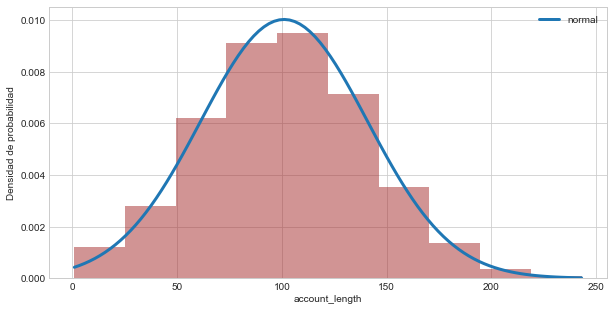

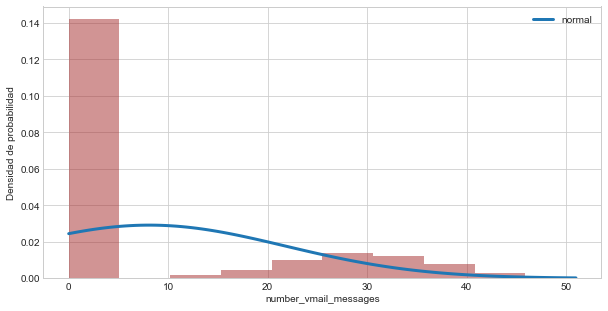

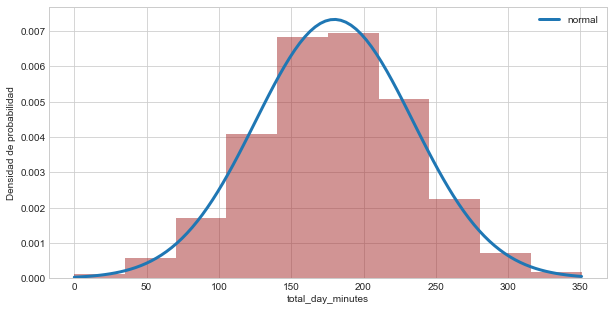

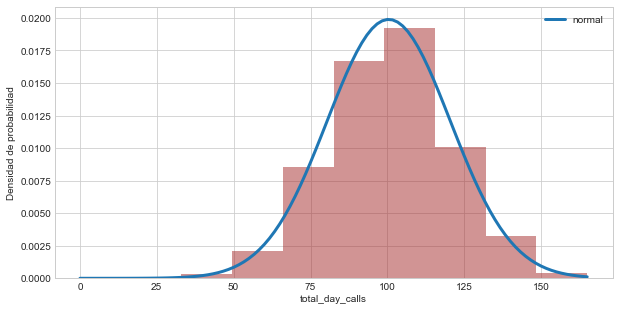

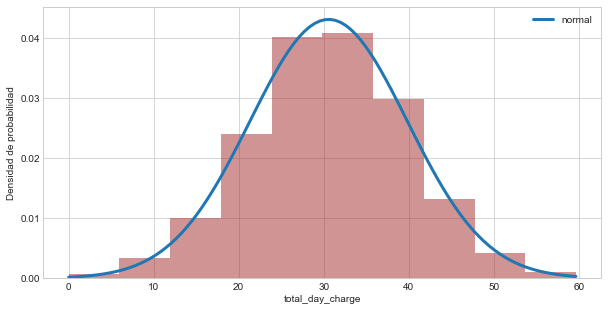

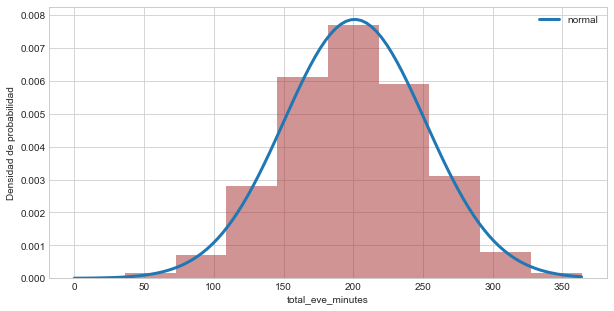

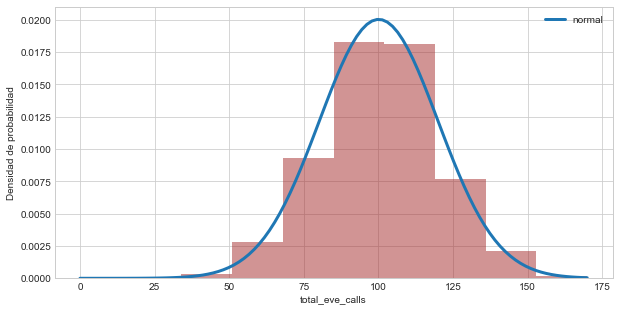

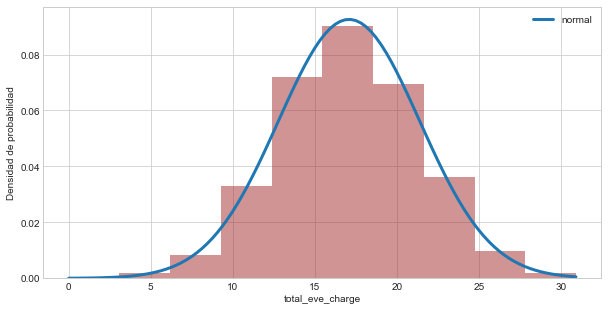

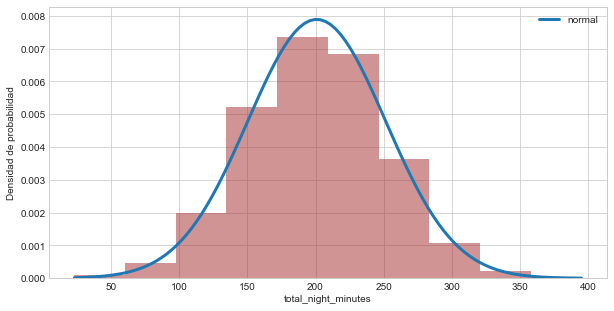

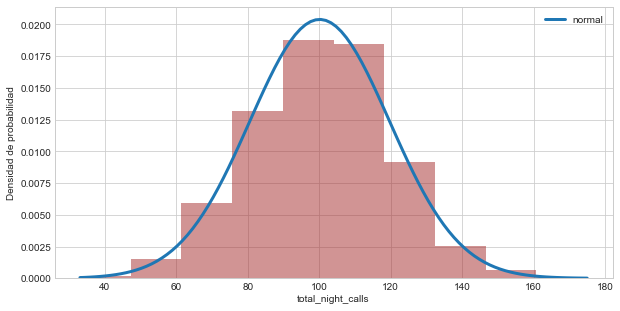

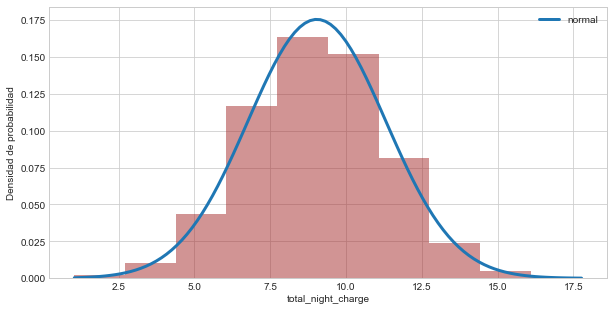

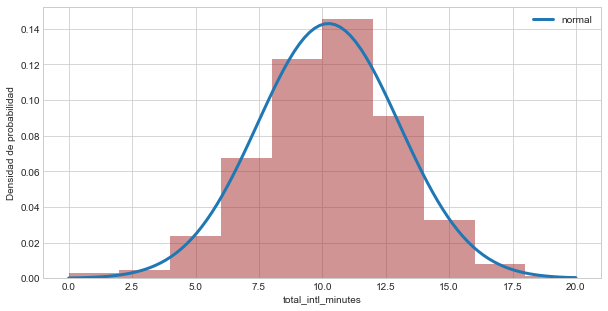

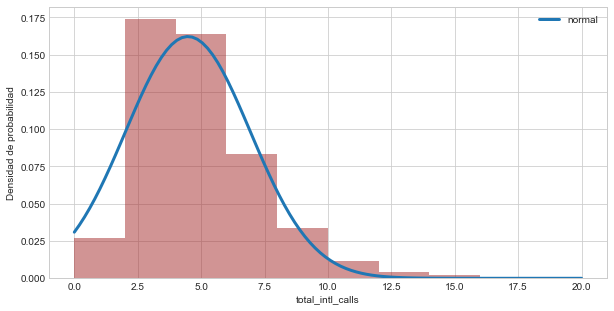

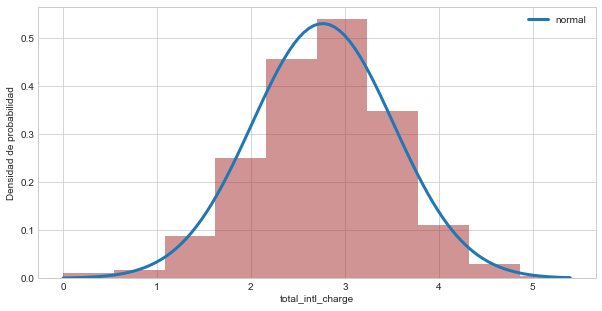

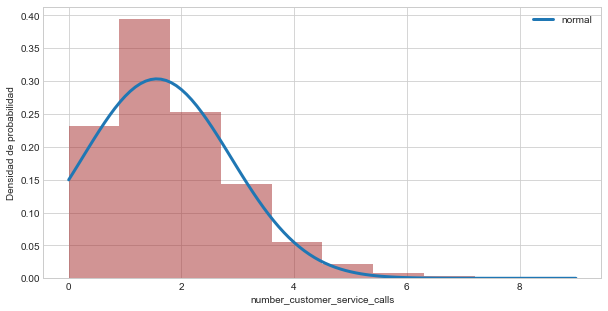

In [71]:
#Recorremos todas las columnas de la lista pertenecientes al df
for i, j in enumerate(lista_atributes):
    distribucion_normal(df,j)

Comentario: Los atributos: total_intl_calls, number_customer_service_calls y number_vmail_messages, no presentan un comportamiento normal de los datos, el resto de los atributos presenta un comportamiento normal. Considerando lo anterior,  podrian se realizará en los atributos mencionados dado su sesgo una transformación logarítmica.

In [74]:
log_vars = [ 'total_intl_calls' , 'number_customer_service_calls' , 'number_vmail_messages']
for i in log_vars:
    df[i] = df[i].apply( lambda x: np.log(x + 0.001 ))

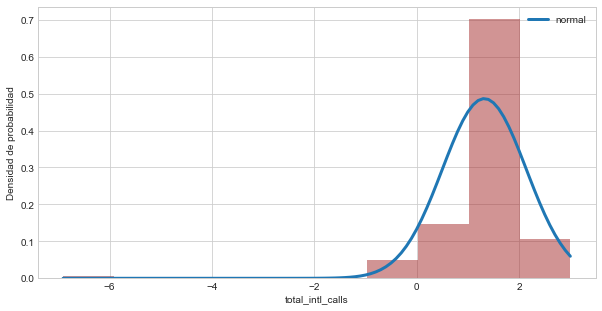

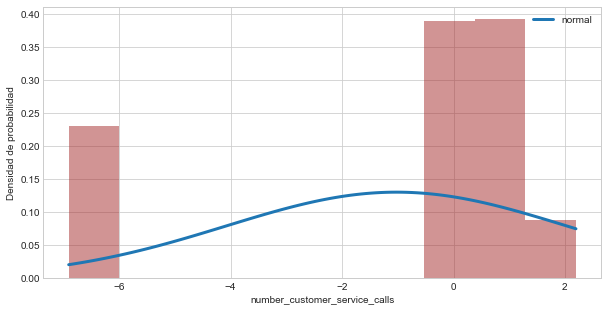

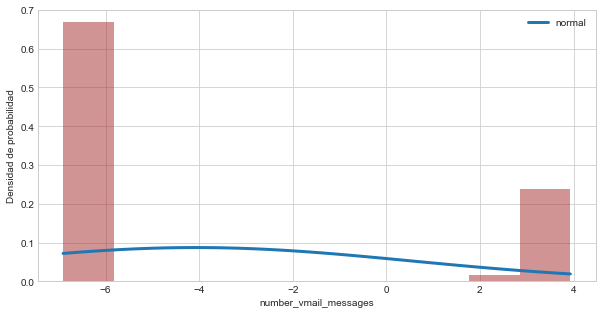

In [75]:
for i, j in enumerate(log_vars):
    distribucion_normal(df,j)


Comentario: Dado que los cambios no son significativos respecto a la distribución, no se realizarán arreglos en las varibales continuas

# Gráficos de densidad para variables del tipo object

In [76]:
lista_atributes_object = ['area_code', 'churn', 'international_plan', 'state', 'voice_mail_plan']

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

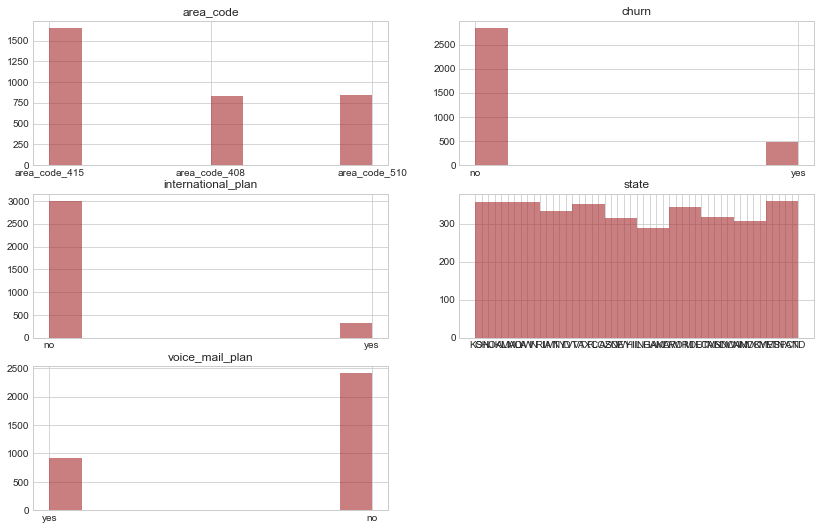

In [77]:
plt.figure(figsize=(14,9))

for i,j in enumerate(lista_atributes_object):
    plt.subplot(3,2,i+1)
    plt.hist(df[j], alpha= .6 , color= 'brown')
    plt.title(j)

plt.tight_layout

Recodificación de las variables con dos clases mediante np.where, considerando la clases con menos datos como 1

In [78]:
df["churn"] = np.where(df['churn']=='yes',1, 0)

In [79]:
df["international_plan"] = np.where(df['international_plan']=='yes',1, 0)

In [80]:
df["voice_mail_plan"] = np.where(df['voice_mail_plan']=='yes',1, 0)

Recodificación del tipo one-Hot Enconding

In [81]:
df["area_code"] = pd.get_dummies(df['area_code'], drop_first = True)

In [82]:
df["state"] = pd.get_dummies(df['state'], drop_first = True)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   uint8  
 1   account_length                 3333 non-null   int64  
 2   area_code                      3333 non-null   uint8  
 3   international_plan             3333 non-null   int32  
 4   voice_mail_plan                3333 non-null   int32  
 5   number_vmail_messages          3333 non-null   float64
 6   total_day_minutes              3333 non-null   float64
 7   total_day_calls                3333 non-null   int64  
 8   total_day_charge               3333 non-null   float64
 9   total_eve_minutes              3333 non-null   float64
 10  total_eve_calls                3333 non-null   int64  
 11  total_eve_charge               3333 non-null   float64
 12  total_night_minutes            3333 non-null   f

In [ ]:
#DESAFÍO 2#
#---------------------------------------------------------------------------------------#

Ejercicio 2: Comparación de AdaBoost y Gradient Boosting
    
● Entrene los clasificadores AdaBoost y Gradient Boosting para mejorar su capacidad
predictiva en la medida de lo posible. Para ello, implemente una búsqueda de grilla
con las siguientes especificaciones:

    Modelo                                                            Grilla
AdaBoostClassifier            {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 500, 1000, 2000]}
GradientBoostingClassifier    {'learning_rate': [0.01, 0.1, 0.5],'n_estimators': [50, 100, 500, 1000, 2000], 'subsample': [0.1,0.5,0.9]}

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,
                                                           'state' : 'number_customer_service_calls' ],
                                                    df['churn'],
                                                    test_size= .33 , random_state= 11238 )

In [85]:
# Entrenamos el decision stump
decision_stump = DecisionTreeClassifier(max_depth= 1 ,
                                        random_state= 11238 ).fit(X_train, y_train)

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
param_grid_1 = { 'n_estimators' : [50, 100, 500, 1000, 2000],
                'learning_rate' : [0.01, 0.1, 0.5]
             }

In [88]:
adaboost_classifier = GridSearchCV(AdaBoostClassifier(),
                                   param_grid = param_grid_1,
                                   cv= 5 , n_jobs= -1 ).fit(X_train, y_train)
    

In [89]:
adaboost_classifier

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [50, 100, 500, 1000, 2000]})

In [90]:
adaboost_y_hat = adaboost_classifier.best_estimator_.predict(X_test)

In [91]:
param_grid_2 = { 'n_estimators' : [50, 100, 500, 1000, 2000],
              'learning_rate' : [0.01, 0.1, 0.5],
              'subsample' : [0.1,0.5,0.9],
             }

In [92]:
gradientb_grid = GridSearchCV(GradientBoostingClassifier(),
                       param_grid = param_grid_2,
                       cv= 5 , n_jobs= -1 ).fit(X_train, y_train)

In [93]:
gradientb_y_hat = gradientb_grid.best_estimator_.predict(X_test)

In [94]:
print( "\n\nAdaptative Boosting Classifier:" )
print( "Mejores Estimadores:" , adaboost_classifier.best_params_,"\n" )
print(classification_report(y_test, adaboost_y_hat, digits= 2 ))

print( "\n\nGradient Boosting Classifier:" )
print( "Mejores Estimadores:" , gradientb_grid.best_params_,"\n" )
print(classification_report(y_test, gradientb_y_hat, digits= 2 ))



Adaptative Boosting Classifier:
Mejores Estimadores: {'learning_rate': 0.1, 'n_estimators': 500} 

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       938
           1       0.60      0.31      0.41       162

    accuracy                           0.87      1100
   macro avg       0.75      0.64      0.67      1100
weighted avg       0.85      0.87      0.85      1100



Gradient Boosting Classifier:
Mejores Estimadores: {'learning_rate': 0.01, 'n_estimators': 2000, 'subsample': 0.9} 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       938
           1       0.88      0.78      0.82       162

    accuracy                           0.95      1100
   macro avg       0.92      0.88      0.90      1100
weighted avg       0.95      0.95      0.95      1100



Comentario: Es posible observar que si bien ambos modelos utilizan los ensambles secuenciales, Adaptative Boosting, al entrenar en función de las observaciones incorrectas tenderá a predecir de peor manera, sobre todo en la clase que presente una menor cantidad de datos (clase 1,churn). Al comparar ambos modelos se observa con claridad que Gradient Boosting supera con creces a Adaptive,alcanzando un f1-score de 0.95, 8 puntos porcentuales por sobre Adaptive, valor que sustenta en que Gradient al entrenarse en base a los errores residuales mejora la predicciones, aún cuando exista un gran desbalance en las clases del vector objetivo. Por ultimo, es posible observar los mejores estimadores de grilla para cada modelo.

In [ ]:
#DESAFÍO 3#
#---------------------------------------------------------------------------------------#

Ejercicio 3: Principales factores asociados
    
● Con el mejor modelo, reporte la importancia relativa de los atributos y comente
cuáles son los que aumentan la probabilidad de fuga en los clientes.

Tip: Pueden implementar la función plot_importance que se encuentra en la lectura
de Bagging y Random Forest.

In [95]:
import lec8_graphs as afx

# Mejor modelo GradientBoosting

In [96]:
best_model = GradientBoostingClassifier(random_state= 11238).fit(X_train, y_train)

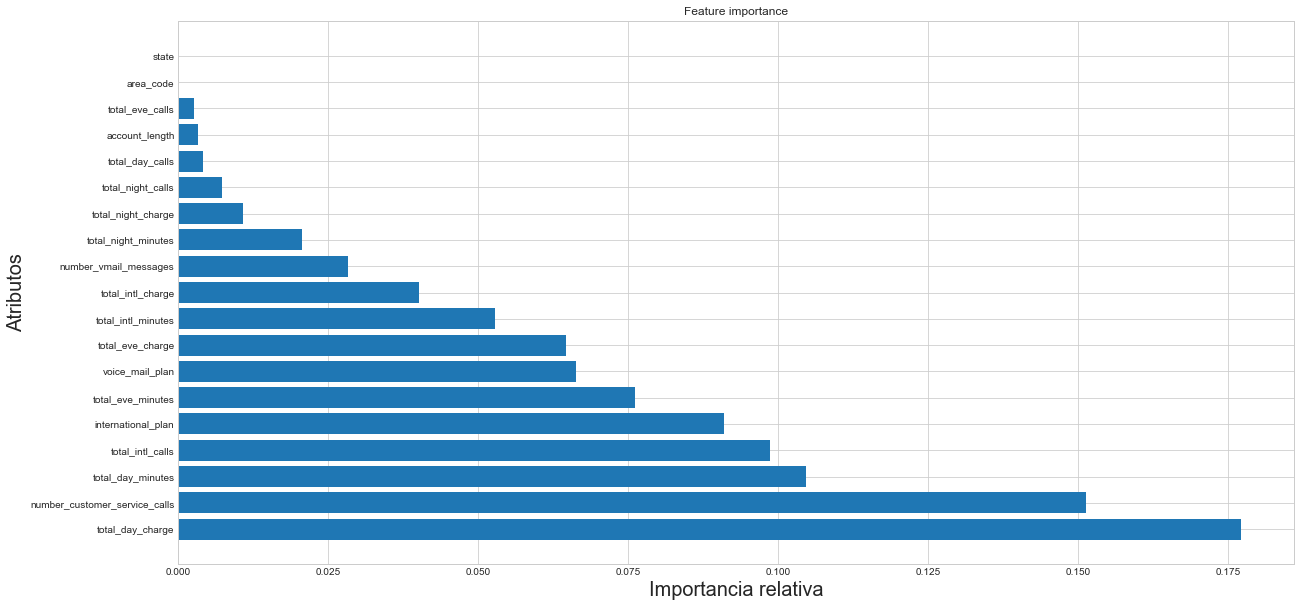

In [97]:
plt.figure(figsize=(20 , 10))
afx.plot_importance(best_model, X_train.columns)
plt.xlabel( "Importancia relativa", size = 20 );
plt.ylabel( 'Atributos' ,size= 20);

Comentario: Los atributos top 3 de importancia relativa son: total_day_charge, total_day_minutes y number_customer_service_calls. Ordenados de manera ascendente en importancia y que podrían aumentar la probabilidad de fuga en los clientes:
1)total_day_minutes : Cantidad de minutos ocupados en la mañana
2)number_customer_service_calls : número de llamadas de atención al cliente
3)total_day_charge : Cobros realizados en la mañana

# Para realizar el ejercicio 4 necesitaré entrenar el modelo con todos los estados, para asi poder determinar la probabilidad de fuga,realizaré una separación de cada clase de "state" que será incorporada al dataframe train, lo mismo se realizará para test.

In [98]:
df = pd.read_csv( 'churn_train.csv' ).drop(columns= 'Unnamed: 0' )

In [99]:
df_copy = df #Generamos un copia del df

In [100]:
df_state = pd.get_dummies(df_copy['state'], drop_first = True) # df con los estados por separado

In [101]:
df_state

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3331,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
df_copy = pd.concat([df, df_state], axis = 1) # df concatenado df.copy + df.state

In [103]:
df_copy

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,...,0,0,0,0,0,0,0,0,0,0
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,...,0,0,0,0,0,0,0,0,0,0
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,...,0,0,0,0,0,0,0,0,0,0
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,...,0,0,0,0,0,0,0,0,0,0
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,215.5,...,0,0,0,0,0,0,0,0,0,0
3329,WV,68,area_code_415,no,no,0,231.1,57,39.29,153.4,...,0,0,0,0,0,0,0,0,1,0
3330,RI,28,area_code_510,no,no,0,180.8,109,30.74,288.8,...,0,0,0,0,0,0,0,0,0,0
3331,CT,184,area_code_510,yes,no,0,213.8,105,36.35,159.6,...,0,0,0,0,0,0,0,0,0,0


In [104]:
df_copy.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn', 'AL', 'AR', 'AZ', 'CA', 'CO',
       'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY',
       'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object')

In [105]:
df_copy["state"] = pd.get_dummies(df['state'], drop_first = True)

In [106]:
df_copy

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,...,0,0,0,0,0,0,0,0,0,0
1,0,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,...,0,0,0,0,0,0,0,0,0,0
2,0,137,area_code_415,no,no,0,243.4,114,41.38,121.2,...,0,0,0,0,0,0,0,0,0,0
3,0,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,...,0,0,0,0,0,0,0,0,0,0
4,0,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,area_code_415,no,yes,36,156.2,77,26.55,215.5,...,0,0,0,0,0,0,0,0,0,0
3329,0,68,area_code_415,no,no,0,231.1,57,39.29,153.4,...,0,0,0,0,0,0,0,0,1,0
3330,0,28,area_code_510,no,no,0,180.8,109,30.74,288.8,...,0,0,0,0,0,0,0,0,0,0
3331,0,184,area_code_510,yes,no,0,213.8,105,36.35,159.6,...,0,0,0,0,0,0,0,0,0,0


In [107]:
df_copy["churn"] = np.where(df_copy['churn']=='yes',1, 0)

In [108]:
df_copy["international_plan"] = np.where(df_copy['international_plan']=='yes',1, 0)

In [109]:
df_copy["voice_mail_plan"] = np.where(df_copy['voice_mail_plan']=='yes',1, 0)

In [110]:
df_copy["area_code"] = pd.get_dummies(df_copy['area_code'], drop_first = True)

In [111]:
X_train_copy, X_test_copy, y_train_copy, y_test_copy = train_test_split(df_copy.drop(columns= 'churn' ),
                                                                        df_copy['churn'],
                                                                        test_size= .33 , random_state= 11238 )

In [112]:
best_model_copy = GradientBoostingClassifier(random_state= 11238).fit(X_train_copy, y_train_copy)

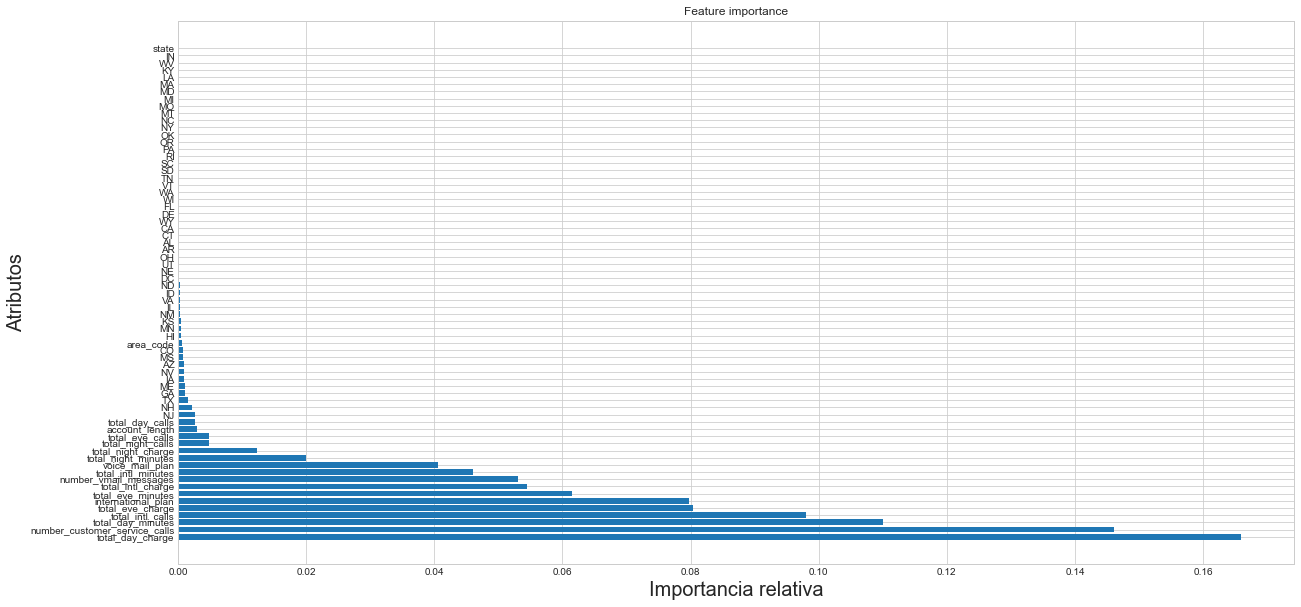

In [113]:
plt.figure(figsize=(20 , 10))
afx.plot_importance(best_model_copy, X_train_copy.columns)
plt.xlabel( "Importancia relativa", size = 20 );
plt.ylabel( 'Atributos' ,size= 20);

# Entreno el mejor modelo con la inclusión de todos los estados

In [114]:
gradientb_grid_copy = GridSearchCV(GradientBoostingClassifier(),
                       param_grid = param_grid_2,
                       cv= 5 , n_jobs= -1 ).fit(X_train_copy, y_train_copy)

In [ ]:
#DESAFÍO 4#
#---------------------------------------------------------------------------------------#

Ejercicio 4: Probabilidad de fuga

● El gerente general necesita saber en qué estados hay una mayor probabilidad de
fuga de clientes. Para ello, identifique los tres estados con una mayor probabilidad
de fuga.

● Implemente el modelo predictivo con el archivo churn_test.csv.

● Recuerde que para obtener la probabilidad de clase, debe utilizar la función
predict_proba del modelo.


In [115]:
df_test = pd.read_csv( 'churn_test.csv' ).drop(columns= 'Unnamed: 0' )

In [116]:
df_test

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no
1663,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,yes
1664,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,no
1665,DC,109,area_code_510,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,no


In [117]:
df_copy_t = df_test # copia del df test

In [118]:
df_state_2 = pd.get_dummies(df_test['state'], drop_first = True) # df con los estados por separado

In [119]:
df_copy_t = pd.concat([df_test, df_state_2], axis = 1) # df concatenado df.copy + df.state

In [120]:
df_copy_t

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,...,0,0,0,0,0,0,0,0,0,0
1,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,...,0,0,0,0,0,0,0,0,0,0
2,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,...,0,0,0,0,0,0,0,0,0,0
3,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,...,0,0,0,0,0,0,0,0,0,0
4,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,...,0,0,0,0,0,0,0,0,0,0
1663,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,...,0,0,0,0,0,0,0,0,1,0
1664,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,...,0,0,0,0,0,0,0,0,0,0
1665,DC,109,area_code_510,no,no,0,188.8,67,32.10,171.7,...,0,0,0,0,0,0,0,0,0,0


In [121]:
df_copy_t["churn"] = np.where(df_copy_t['churn']=='yes',1, 0)

In [122]:
df_copy_t["international_plan"] = np.where(df_copy_t['international_plan']=='yes',1, 0)

In [123]:
df_copy_t["voice_mail_plan"] = np.where(df_copy_t['voice_mail_plan']=='yes',1, 0)

In [124]:
df_copy_t["area_code"] = pd.get_dummies(df_copy_t['area_code'], drop_first = True)

In [125]:
df_copy_t["state"] = pd.get_dummies(df_copy_t['state'], drop_first = True)

In [126]:
df_copy_t

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,101,0,0,0,0,70.9,123,12.05,211.9,...,0,0,0,0,0,0,0,0,0,0
1,0,137,0,0,0,0,223.6,86,38.01,244.8,...,0,0,0,0,0,0,0,0,0,0
2,0,103,0,0,1,29,294.7,95,50.10,237.3,...,0,0,0,0,0,0,0,0,0,0
3,0,99,1,0,0,0,216.8,123,36.86,126.4,...,0,0,0,0,0,0,0,0,0,0
4,0,108,1,0,0,0,197.4,78,33.56,124.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,0,50,0,0,1,40,235.7,127,40.07,223.0,...,0,0,0,0,0,0,0,0,0,0
1663,0,152,1,0,0,0,184.2,90,31.31,256.8,...,0,0,0,0,0,0,0,0,1,0
1664,0,61,1,0,0,0,140.6,89,23.90,172.8,...,0,0,0,0,0,0,0,0,0,0
1665,0,109,0,0,0,0,188.8,67,32.10,171.7,...,0,0,0,0,0,0,0,0,0,0


# Ocupo toda la muestra de validación para probar el modelo 

In [127]:
X_test_final = df_copy_t.drop(columns="churn")

In [128]:
y_test_final = df_test["churn"]

In [129]:
predic_model_final = gradientb_grid_copy.best_estimator_.predict_proba(X_test_final)

In [130]:
predic_model_final[39] # yes, corresponde la probabilidad (1) con 0.85702351

array([0.2413558, 0.7586442])

# Genero una lista con todos los valores de la probabilidad "yes" del df_copy_t

In [131]:
lista_yes = []
for i in predic_model_final:
        lista_yes.append(i[1])
        

In [132]:
len(lista_yes)

1667

In [133]:
df_copy_t = df_copy_t.assign(prediccion_yes = lista_yes) 

In [134]:
df_copy_t

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,prediccion_yes
0,0,101,0,0,0,0,70.9,123,12.05,211.9,...,0,0,0,0,0,0,0,0,0,0.020297
1,0,137,0,0,0,0,223.6,86,38.01,244.8,...,0,0,0,0,0,0,0,0,0,0.034296
2,0,103,0,0,1,29,294.7,95,50.10,237.3,...,0,0,0,0,0,0,0,0,0,0.142837
3,0,99,1,0,0,0,216.8,123,36.86,126.4,...,0,0,0,0,0,0,0,0,0,0.051707
4,0,108,1,0,0,0,197.4,78,33.56,124.0,...,0,0,0,0,0,0,0,0,0,0.014402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,0,50,0,0,1,40,235.7,127,40.07,223.0,...,0,0,0,0,0,0,0,0,0,0.075770
1663,0,152,1,0,0,0,184.2,90,31.31,256.8,...,0,0,0,0,0,0,0,1,0,0.053690
1664,0,61,1,0,0,0,140.6,89,23.90,172.8,...,0,0,0,0,0,0,0,0,0,0.041349
1665,0,109,0,0,0,0,188.8,67,32.10,171.7,...,0,0,0,0,0,0,0,0,0,0.020810


In [135]:
state = df_test.pop("state")

In [136]:
state

0       HI
1       MT
2       OH
3       NM
4       SC
        ..
1662    HI
1663    WV
1664    DC
1665    DC
1666    VT
Name: state, Length: 1667, dtype: object

# Incorporaré la nueva columna eliminada por "state" por la variable "state" que incluye los estados 

In [137]:
df_copy_t = df_copy_t.assign(state = state)

In [138]:
df_copy_t

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,prediccion_yes
0,HI,101,0,0,0,0,70.9,123,12.05,211.9,...,0,0,0,0,0,0,0,0,0,0.020297
1,MT,137,0,0,0,0,223.6,86,38.01,244.8,...,0,0,0,0,0,0,0,0,0,0.034296
2,OH,103,0,0,1,29,294.7,95,50.10,237.3,...,0,0,0,0,0,0,0,0,0,0.142837
3,NM,99,1,0,0,0,216.8,123,36.86,126.4,...,0,0,0,0,0,0,0,0,0,0.051707
4,SC,108,1,0,0,0,197.4,78,33.56,124.0,...,0,0,0,0,0,0,0,0,0,0.014402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,HI,50,0,0,1,40,235.7,127,40.07,223.0,...,0,0,0,0,0,0,0,0,0,0.075770
1663,WV,152,1,0,0,0,184.2,90,31.31,256.8,...,0,0,0,0,0,0,0,1,0,0.053690
1664,DC,61,1,0,0,0,140.6,89,23.90,172.8,...,0,0,0,0,0,0,0,0,0,0.041349
1665,DC,109,0,0,0,0,188.8,67,32.10,171.7,...,0,0,0,0,0,0,0,0,0,0.020810


In [139]:
mean_proba_state = df_copy_t.groupby("state")["prediccion_yes"].mean()

In [140]:
sort_mean_state = mean_proba_state.sort_values(ascending=False)

# Gráfico de probabilidad de fuga

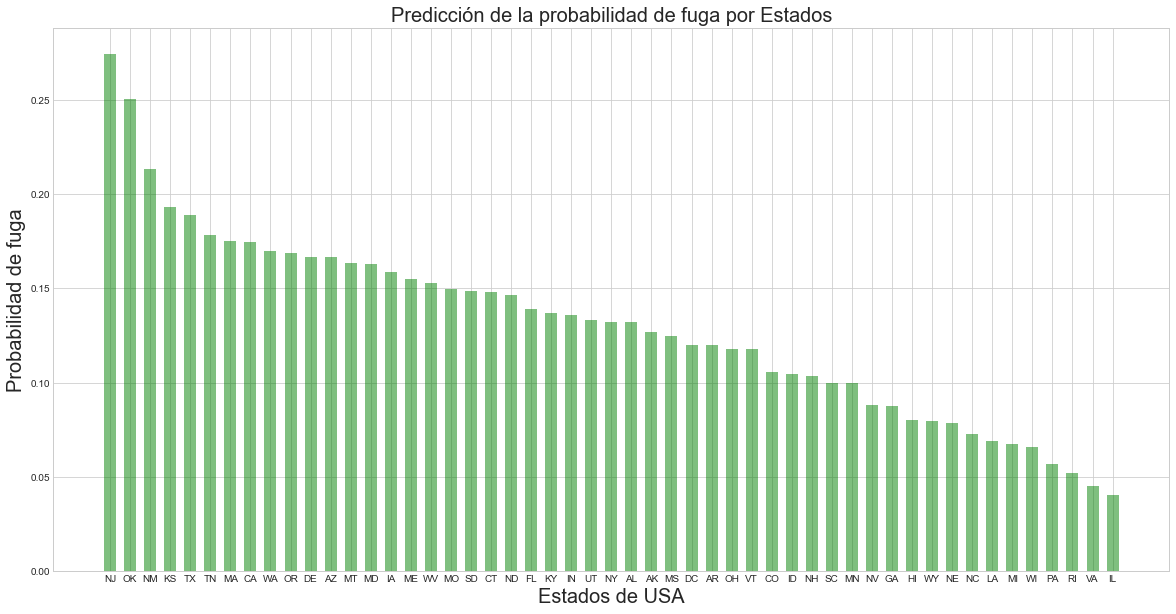

In [141]:
plt.figure(figsize=(20,10))
plt.bar(sort_mean_state.index, sort_mean_state.values, width=0.6, alpha=.5, color='green')
plt.title("Predicción de la probabilidad de fuga por Estados", size = 20)
plt.xlabel( "Estados de USA", size = 20 );
plt.ylabel( 'Probabilidad de fuga' ,size= 20);

Comentario: Es posible observar que los tres estados con una mayor probabilidad de fuga de clientes son: NU, OK y NM.